# SVR (Destek Vektör Regresyonu)

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [5]:
from sklearn.svm import SVR

In [6]:
svr_model = SVR(kernel='linear').fit(X_train, y_train)

In [7]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [8]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [9]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [10]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [11]:
y_pred = svr_model.predict(X_train)

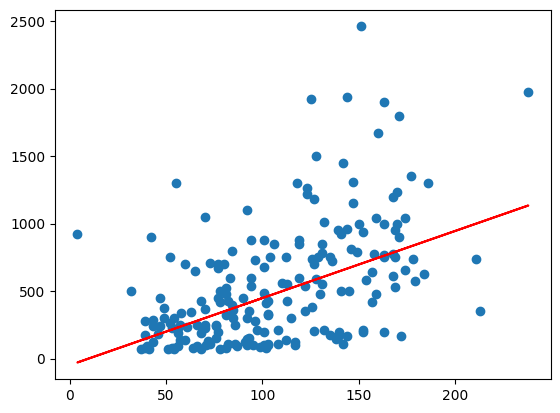

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="r")

In [13]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [14]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

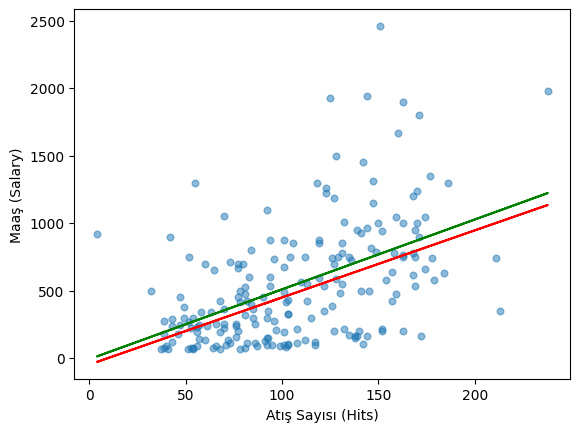

In [15]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [16]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [17]:
svr_model.predict([[91]])

array([403.52804878])

In [18]:
y_pred = svr_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [20]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [21]:
svr_model

SVR(kernel='linear')

In [22]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [23]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [25]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [26]:
y_pred = svr_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116